In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
airline_data = pd.read_excel("EastWestAirlines.xlsx",'data')
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
airline_data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
airline_data.shape

(3999, 12)

In [5]:
airline_data.duplicated().sum()

0

In [6]:
airline_data.drop(['ID#','Qual_miles','Award?'], axis=1,inplace=True)

In [7]:
airline_data

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403
3995,64385,1,1,1,981,5,0,0,1395
3996,73597,3,1,1,25447,8,0,0,1402
3997,54899,1,1,1,500,1,500,1,1401


# Hierarchical

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(airline_data)
df_norm.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


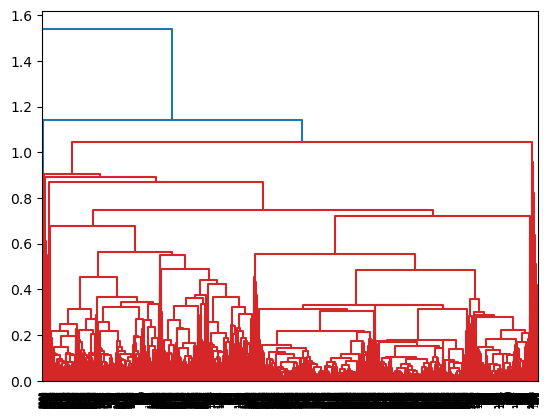

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [13]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [15]:
df_norm['h_clusterid'] = Clusters
df_norm.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,1
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,1
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,1
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,1
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1


In [16]:
airline_data['h_clusterid'] = Clusters
airline_data.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,1,1,1,174,1,0,0,7000,1
1,19244,1,1,1,215,2,0,0,6968,1
2,41354,1,1,1,4123,4,0,0,7034,1
3,14776,1,1,1,500,1,0,0,6952,1
4,97752,4,1,1,43300,26,2077,4,6935,1


In [17]:
airline_data.sort_values("h_clusterid")

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
3338,84148,1,1,5,84148,7,0,0,1054,0
1036,154664,4,1,3,73881,33,0,0,5769,0
2283,128456,5,1,3,70125,28,0,0,3764,0
850,25629,4,1,5,107308,36,600,2,5966,0
1946,126873,4,1,5,95598,32,500,1,3880,0
...,...,...,...,...,...,...,...,...,...,...
220,1302051,5,1,1,90653,32,3050,7,7467,2
3594,27619,4,1,1,83726,68,14050,46,1325,2
3583,160114,1,1,1,71954,86,30817,53,1373,3
3235,287033,1,1,1,26161,58,12873,53,2272,3


In [18]:
df_clust = airline_data.groupby('h_clusterid').mean()
df_clust

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,
0,141021.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857
1,70258.815662,2.024155,1.014493,1.001271,15900.905924,11.186117,391.822782,1.167302,4090.250191
2,315432.224490,4.428571,1.020408,1.000000,89302.918367,37.693878,5096.612245,15.938776,6437.510204
3,223573.500000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000
4,126167.000000,5.000000,1.000000,1.000000,190160.000000,15.000000,0.000000,0.000000,1612.000000


# KMEANS

In [19]:
from sklearn.cluster import KMeans 

In [20]:
airline_kdata = pd.read_excel("EastWestAirlines.xlsx",'data')

In [21]:
airline_kdata.drop(['ID#','Qual_miles','Award?'], axis=1,inplace=True)

In [22]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(airline_kdata)
scaled_features

array([[-4.51140783e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05,  6.83121167e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -7.69578406e-01, -9.82418871e-02, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [23]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_features)

KMeans(n_clusters=2)

In [24]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
k_means.inertia_

28108.95257605084

In [26]:
r = range(1,11)
wss =[] 
for i in r:
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_features)
    wss.append(KM.inertia_)

In [27]:
wss

[35991.00000000011,
 28108.980827991996,
 23651.653949463598,
 19900.357129112326,
 17995.34722763534,
 14565.659999569012,
 13044.904890239162,
 11893.964661355607,
 10796.628442881238,
 10110.357737816457]

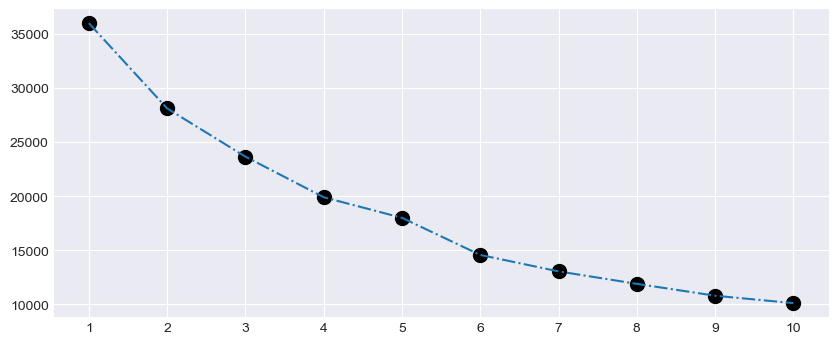

In [28]:
#plt.plot(range(1,11), wss)

plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(r,wss,s=100,color="black")
plt.plot(r,wss,linestyle="-.")
plt.xticks(r)
plt.show()

In [29]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_features)
labels = k_means.labels_

In [30]:
airline_kdata["Clus_kmeans"] = labels
airline_kdata.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clus_kmeans
0,28143,1,1,1,174,1,0,0,7000,2
1,19244,1,1,1,215,2,0,0,6968,2
2,41354,1,1,1,4123,4,0,0,7034,2
3,14776,1,1,1,500,1,0,0,6952,2
4,97752,4,1,1,43300,26,2077,4,6935,1


In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
silhouette_score(scaled_features,labels)

0.2588927369382841

# DBSCAN

In [33]:
airline_ddata =  pd.read_excel("EastWestAirlines.xlsx",'data')

In [34]:
airline_ddata.drop(['ID#','Award?','Qual_miles'], axis=1,inplace=True)

In [35]:
array = airline_ddata.values
array

array([[28143,     1,     1, ...,     0,     0,  7000],
       [19244,     1,     1, ...,     0,     0,  6968],
       [41354,     1,     1, ...,     0,     0,  7034],
       ...,
       [73597,     3,     1, ...,     0,     0,  1402],
       [54899,     1,     1, ...,   500,     1,  1401],
       [ 3016,     1,     1, ...,     0,     0,  1398]], dtype=int64)

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05,  6.83121167e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -7.69578406e-01, -9.82418871e-02, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [37]:
dbscan=DBSCAN(eps=0.7,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=6)

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [40]:
clustered = pd.concat([airline_ddata,cl],axis=1)
clustered

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403,0
3995,64385,1,1,1,981,5,0,0,1395,0
3996,73597,3,1,1,25447,8,0,0,1402,4
3997,54899,1,1,1,500,1,500,1,1401,0


In [41]:
clustered[clustered['Cluster']==-1]

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
4,97752,4,1,1,43300,26,2077,4,6935,-1
8,443003,3,2,1,1753,43,3850,12,6948,-1
9,104860,3,1,1,28426,28,1150,3,6931,-1
20,120576,5,1,1,58831,23,250,2,6896,-1
21,185681,1,1,1,13300,16,1800,9,6896,-1
...,...,...,...,...,...,...,...,...,...,...
3930,40424,4,1,1,44110,26,343,3,1523,-1
3934,76595,1,1,1,10577,2,9577,1,1515,-1
3946,139032,3,1,1,19565,17,1150,4,1481,-1
3950,59650,1,1,1,5050,16,3950,13,1476,-1


In [42]:
clustered.Cluster.value_counts()

 0    2017
-1     672
 4     517
 3     405
 1     244
 2     114
 5      15
 7       9
 6       6
Name: Cluster, dtype: int64

In [43]:
clustered.mean()

Balance              73601.327582
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Cluster                  0.814454
dtype: float64

In [44]:
df_clust = clustered.groupby('Cluster').mean()
df_clust

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,,,,
-1,179992.494048,2.889881,1.046131,1.072917,41391.412202,22.401786,2088.952381,6.053571,4842.154762
0,36250.930590,1.000000,1.000000,1.000000,2728.301438,5.395141,153.980664,0.516113,3653.095191
1,57537.540984,2.000000,1.000000,1.000000,9976.577869,13.495902,50.483607,0.151639,4263.323770
2,103599.929825,5.000000,1.000000,1.000000,62318.228070,17.140351,66.763158,0.228070,4941.578947
3,90411.765432,4.000000,1.000000,1.000000,38382.748148,17.032099,157.812346,0.456790,4785.518519
4,71084.431335,3.000000,1.000000,1.000000,18927.864603,14.984526,79.547389,0.259188,4286.063830
5,32234.866667,1.000000,2.000000,1.000000,8078.933333,12.066667,0.000000,0.000000,3490.066667
6,28486.833333,1.000000,3.000000,1.000000,14722.333333,14.833333,41.666667,0.166667,4272.000000
7,43023.777778,3.000000,1.000000,1.000000,18380.777778,33.111111,21.000000,0.111111,1366.000000
